### IMPORTACIÓN DE PAQUETES

In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### DATA

In [ ]:
data = pd.read_csv("/content/Indice.csv")
df=data.copy()
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index("date", inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### ELIMINACIÓN DE VARIABLES

In [ ]:
df['market_value']=df.nikkei

In [ ]:
del df['spx']
del df['dax']
del df['ftse']
del df['nikkei']
size = int(len(df)*0.8)
df, df_test = df.iloc[:size], df.iloc[size:]

### DESCOMPOSICIÓN DE SERIES 

In [ ]:
s_desc = seasonal_decompose(df.market_value)
s_desc.plot()
plt.show()

#### ADITIVA

In [ ]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

#### MULTIPLICATIVA

In [ ]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ESTACIONARIEDAD

#### RUIDO BLANCO (WHITE NOISE)

In [ ]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [ ]:
df['wn'] = wn

In [ ]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1093.589286
std,292.559287,291.038589
min,438.920000,-110.699933
25%,914.620000,893.721637
50%,1144.650000,1092.500917
75%,1316.280729,1290.678650
max,1570.252238,2044.438875


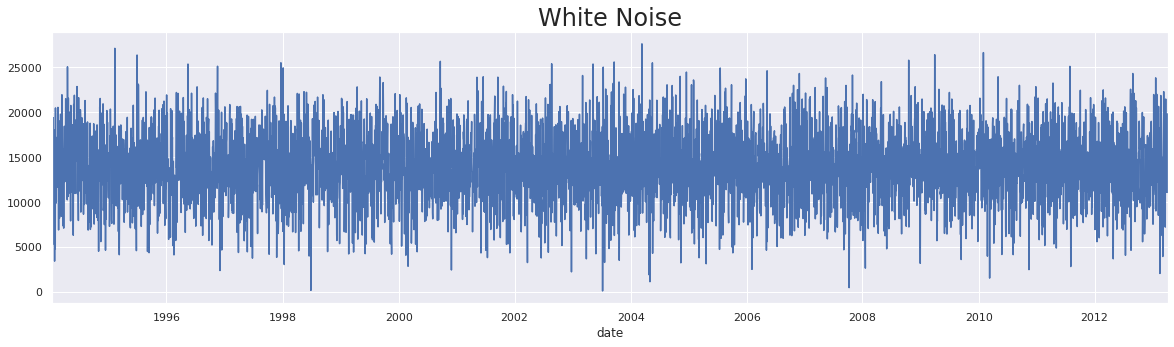

In [14]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise", size= 24)
plt.show()

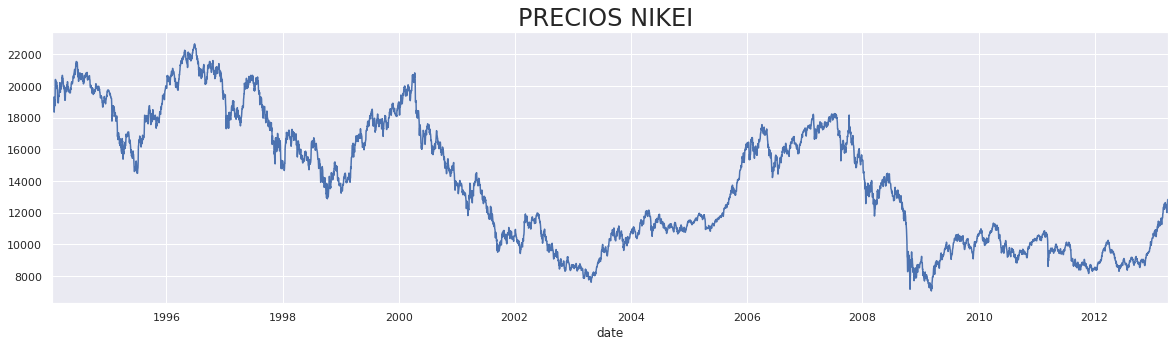

In [25]:
df.market_value.plot(figsize=(20,5))
plt.title("PRECIOS NIKEI ", size = 24)
plt.show()

#### CAMINATA ALEATORIA (RANDOM WALK)

In [16]:
rw = pd.read_csv("/content/caminoaleatorio.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [17]:
rw = rw.asfreq('b')

In [18]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [19]:
df['rw'] = rw.price

In [20]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,18124.01,7761.322119,1122.139662
1994-01-10,18443.44,17584.112657,1080.347860
1994-01-11,18485.25,12755.456768,1082.095245
1994-01-12,18793.88,15046.625909,1083.639265
1994-01-13,18577.26,5220.743556,1067.146255


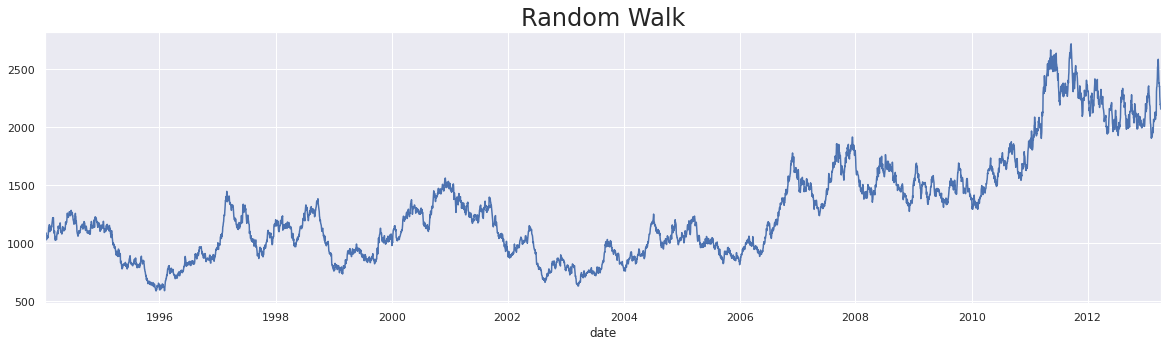

In [21]:
df.rw.plot(figsize = (20,5))
plt.title("Random Walk", size = 24)
plt.show()

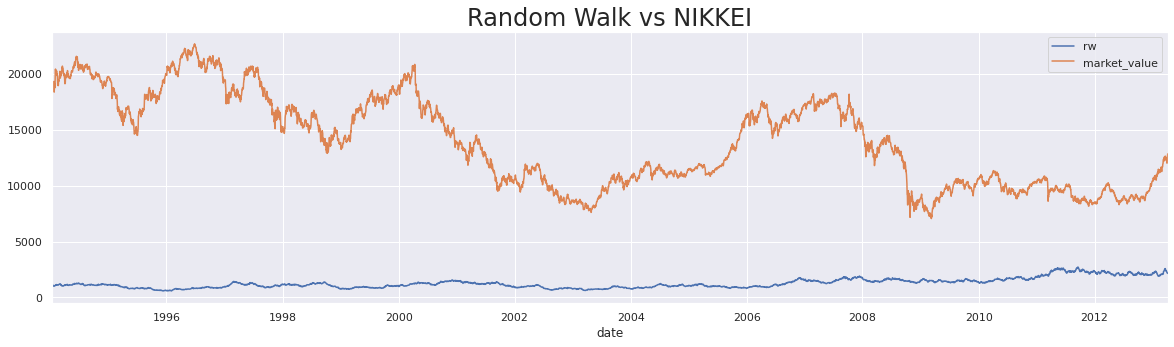

In [22]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs NIKKEI", size = 24)
plt.legend() 
plt.show()

#### PRUEBAS DE ESTACIONARIEDAD

##### ADF Test：Augmented Dickey-Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Ho : La serie no es estacionaria

Ha : La serie es estacionaria

Si el estadístico de contraste es menor al valor crítico se rechaza la Hipótesis Nula.

En valor absoluto: 
Si el estadístico de contraste mayor en valor absoluto al valor crítico se rechaza la Hipótesis Nula.

Si el valor_p obtenido de la hipótesis es menor que el umbral (generalmente 5%), entonces la Hipótesis Nula no es válida; de lo contrario, la hipótesis Nula es válida.

In [ ]:
sts.adfuller(df.market_value)

(-1.7369847452352445,
 0.4121645696770618,
 18,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 39904.880607487445)

No se rechaza Ho. Así, La serie es no estacionaria

In [ ]:
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'n_lags: {result[2]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

In [ ]:
adf_test(df.market_value)

ADF Statistic: -1.7369847452352454
p-value: 0.4121645696770613
n_lags: 18
Critial Values:
   1%, -3.431658008603046
Critial Values:
   5%, -2.862117998412982
Critial Values:
   10%, -2.567077669247375
Result: The series is not stationary


In [ ]:
adf_test(df.wn)

ADF Statistic: -70.96536904134041
p-value: 0.0
n_lags: 0
Critial Values:
   1%, -3.431653316130827
Critial Values:
   5%, -2.8621159253018247
Critial Values:
   10%, -2.5670765656497516
Result: The series is stationary


Se rechaza Ho. Por lo que, el WN es estacionario

In [ ]:
adf_test(df.rw)


ADF Statistic: -1.3286073927689719
p-value: 0.6159849181617385
n_lags: 24
Critial Values:
   1%, -3.4316595802782865
Critial Values:
   5%, -2.8621186927706463
Critial Values:
   10%, -2.567078038881065
Result: The series is not stationary


No se rechaza Ho. Por lo que, el RW no es estacionario

##### KPSS Test：Kwiatkowski-Phillips-Schmidt-Shin Test

In [ ]:
from statsmodels.tsa.stattools import kpss

Ho: Suponga que la serie es estacionaria. 

Ha: La serie no es estacionaria.

Si el valor_p obtenido de la hipótesis es menor que el umbral (generalmente 5%), entonces la Hipótesis Nula no es válida; de lo contrario, la hipótesis Nula es válida.

In [ ]:
sts.kpss(df.market_value)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(6.401585241919265,
 0.01,
 32,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

Pues que el valor_p (0.01) es menor a 0.05 entonces se rechaza Ho. Es decir, la serie no es estacionaria

In [ ]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df.market_value)

KPSS Statistic: 6.401585241919265
p-value: 0.01
num lags: 32
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [ ]:
kpss_test(df.wn)

KPSS Statistic: 0.11776553283217343
p-value: 0.1
num lags: 32
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### FUNCIONES DE AUTOCORRELACIÓN

#### AUTOCORRELACIÓN SIMPLE (ACF)

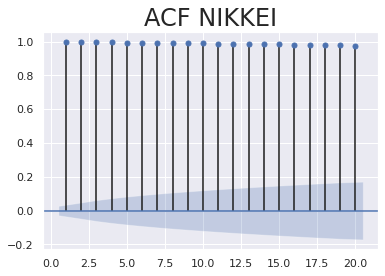

In [30]:
sgt.plot_acf(df.market_value, lags = 20, zero = False)
plt.title("ACF NIKKEI", size = 24)
plt.show()

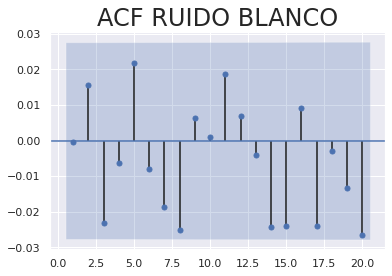

In [29]:
sgt.plot_acf(df.wn, lags = 20, zero = False)
plt.title("ACF RUIDO BLANCO", size = 24)
plt.show()

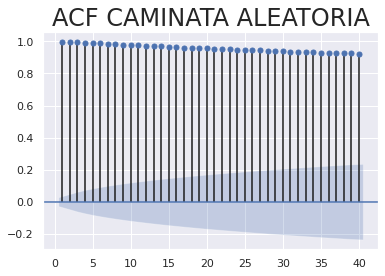

In [31]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF CAMINATA ALEATORIA", size = 24)
plt.show()

#### AUTOCORRELACIÓN PARCIAL (PACF)

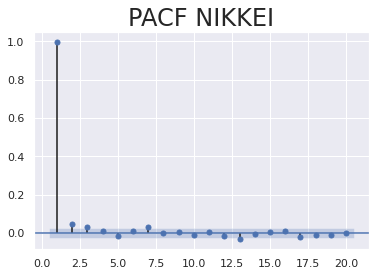

In [32]:
sgt.plot_pacf(df.market_value, lags = 20, zero = False, method = ('ols'))
plt.title("PACF NIKKEI", size = 24)
plt.show()

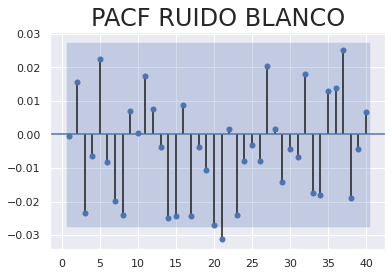

In [33]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF RUIDO BLANCO", size = 24)
plt.show()

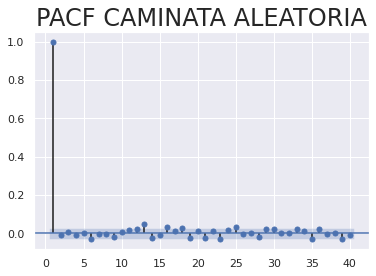

In [34]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF CAMINATA ALEATORIA", size = 24)
plt.show()